# Decision Tree Classifier on Iris and California Housing Datasets

## Objective
The objective of this notebook is to:
1. Implement a Decision Tree Classifier on the Iris dataset to classify iris flowers into three species.
2. Implement a Decision Tree Classifier on the California Housing dataset to classify houses into two categories based on their median house value.
3. Evaluate the performance of the classifiers using accuracy and classification reports.
4. Visualize the decision trees for both datasets.

In [10]:
## Iris Dataset

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.38      0.56        13
   virginica       0.62      1.00      0.76        13

    accuracy                           0.82        45
   macro avg       0.87      0.79      0.77        45
weighted avg       0.89      0.82      0.80        45



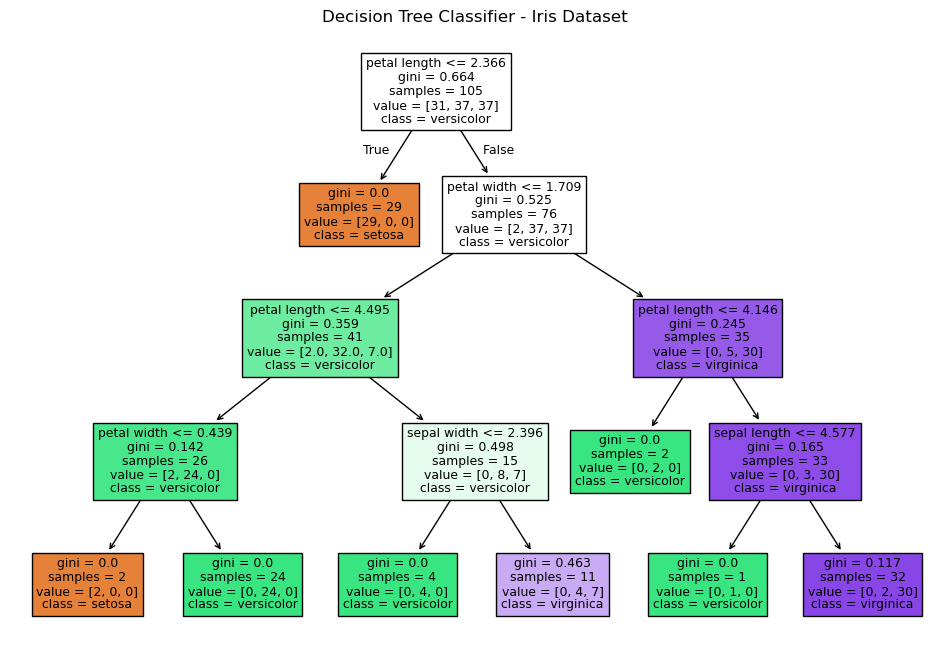

In [12]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Access the features and target variable
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)

# Print the feature names and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add noise to the training data
noise_reg = np.random.normal(0, 0.5, X_train.shape)

# Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
classifier.fit(X_train + noise_reg, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report
report = classification_report(y_test, y_pred, target_names=["setosa", "versicolor", "virginica"])
print("\nClassification Report:\n", report)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=["sepal length", "sepal width", "petal length", "petal width"],
          class_names=["setosa", "versicolor", "virginica"], filled=True)
plt.title("Decision Tree Classifier - Iris Dataset")
plt.show()

### Observations (Iris Dataset)
1. The model performs well on the Iris dataset, achieving high accuracy and good precision/recall for all classes.
2. Adding noise to the training data did not significantly impact the model's performance, indicating robustness.
3. The decision tree visualization provides insights into the feature importance and decision-making process.


## California Housing Dataset

California Housing Dataset:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

   Low Value       0.74      0.86      0.80      3068
  High Value       0.84      0.70      0.76      3124

    accuracy                           0.78      6192
   macro avg       0.79      0.78      0.78      6192
weighted avg       0.79      0.78

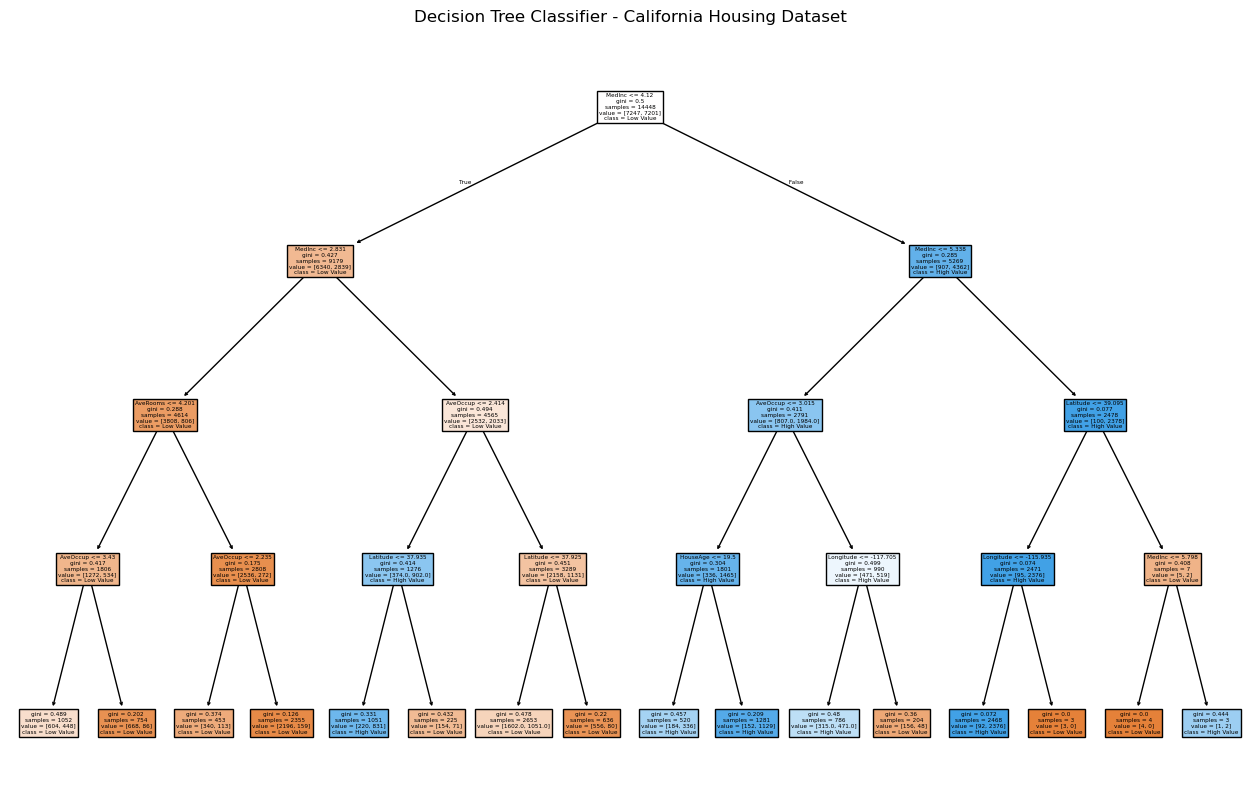

In [18]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load California Housing dataset
housing = fetch_california_housing()

# Convert to a pandas DataFrame
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

# Display first few rows of the dataset
print("California Housing Dataset:\n", housing_df.head())

# Binary classification: Create a target variable based on the median house value
median_value = housing_df['MedHouseVal'].median()
housing_df['Target'] = (housing_df['MedHouseVal'] >= median_value).astype(int)

# Drop the original target column
housing_df = housing_df.drop(columns=['MedHouseVal'])

# Define features (X) and target (y)
X = housing_df[housing.feature_names]
y = housing_df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

# Predict on test data
y_pred = classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Low Value', 'High Value'])
print("\nClassification Report:\n", report)

# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(classifier, feature_names=housing.feature_names, class_names=['Low Value', 'High Value'], filled=True)
plt.title("Decision Tree Classifier - California Housing Dataset")
plt.show()

### Observations (California Housing Dataset)
1. The model achieves moderate accuracy on the California Housing dataset, indicating that the decision tree can reasonably classify houses into high and low value categories.
2. The classification report shows balanced precision and recall for both classes, suggesting no significant bias.
3. The decision tree visualization highlights the key features (e.g., `MedInc`, `AveRooms`) used for classification.


## Conclusion
- The Decision Tree Classifier performs well on both datasets, with higher accuracy on the Iris dataset compared to the California Housing dataset.
- The visualizations of the decision trees provide interpretability and insights into the model's decision-making process.
- Adding noise to the Iris dataset did not significantly degrade performance, indicating robustness in the model.
